# Task 4

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


## Import necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

## Load the dataset and assign column names

In [10]:
col_names = ['ID', 'Entity', 'Sentiments', 'Contest']
df = pd.read_csv('twitter_training.csv', names=col_names)


## Display the first few rows of the dataset

In [13]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Data Cleaning

### Check for missing values

In [17]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

### Drop rows with missing values in the 'Contest' column

In [20]:
df.dropna(axis=0, inplace=True)

### Check for duplicates

In [23]:
df.duplicated().sum()

2340

### Drop duplicate rows

In [26]:
df.drop_duplicates(inplace=True)

### Verify data after cleaning

In [29]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [33]:
df.shape

(71656, 4)

## Sentiment Distribution

### Get the count of each sentiment

In [37]:
sentiment_counts = df['Sentiments'].value_counts()

In [39]:
print(sentiment_counts)

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


### Plot sentiment distribution

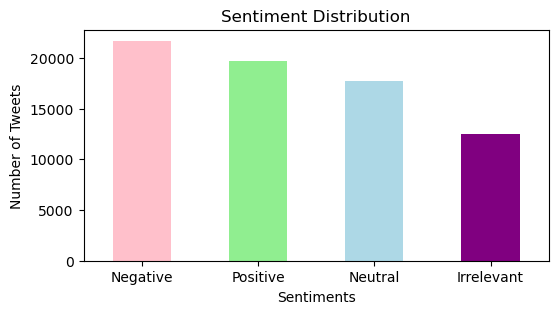

In [44]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['pink', 'lightgreen', 'lightblue', 'purple'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiments')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

## Sentiment Analysis for a Specific Brand

### Filter tweets related to a specific brand (e.g., Microsoft)

In [48]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]

In [50]:
### Sentiment distribution for the specific brand

In [52]:
brand_sentiment_counts = brand_data['Sentiments'].value_counts()

In [54]:
print(brand_sentiment_counts)

Sentiments
Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: count, dtype: int64


## Plot pie chart for the brand sentiment distribution

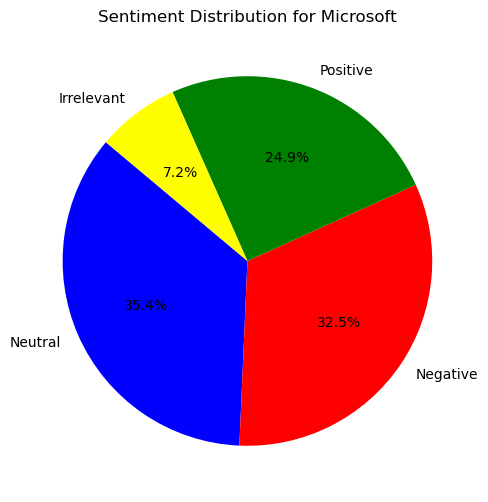

In [57]:
plt.figure(figsize=(6, 6))
plt.pie(
    brand_sentiment_counts, 
    labels=brand_sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['blue', 'red', 'green', 'yellow']
)
plt.title('Sentiment Distribution for Microsoft')
plt.show()


In [59]:
df.describe()

,ID
count,71656.000000
mean,6436.437242
std,3742.291368
min,1.000000
25%,3199.000000
50%,6432.500000
75%,9604.000000
max,13200.000000
